In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

from matplotlib import pyplot as plt
from papermage import Document, Span, Box, Entity
from papermage.visualizers.visualizer import plot_entities_on_page

from papermage_components.table_transformer_structure_predictor import TableTransformerStructurePredictor, TatrPrediction
from papermage_components.matIE_predictor import MatIEPredictor
from papermage_components.utils import get_table_image, globalize_box_coordinates, visualize_table_with_boxes

/home/svarna/miniconda3/envs/htmax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
json_filename = "data/On the creep performance of the Ti‐6Al‐4V alloy processed by additive manufacturing.json"

with open(json_filename) as f:
  parsed_paper = Document.from_json(json.load(f))

In [4]:
parsed_paper

Document with 33 layers: ['symbols', 'images', 'metadata', 'tokens', 'rows', 'pages', 'reading_order_sections', 'words', 'sentences', 'blocks', 'vila_entities', 'titles', 'paragraphs', 'authors', 'abstracts', 'keywords', 'sections', 'lists', 'bibliographies', 'equations', 'algorithms', 'figures', 'tables', 'captions', 'headers', 'footers', 'footnotes', 'TAGGED_IMAGE_MathPix', 'TAGGED_ENTITIES_ChemDataExtractor', 'TAGGED_IMAGE_Table_Transformer', 'TAGGED_ENTITIES_alvaroalon2/biobert_chemical_ner', 'TAGGED_ENTITIES_dslim/bert-base-NER', 'TAGGED_GENERATION_gpt-3.5-turbo-instruct']

In [5]:
tableEntity = parsed_paper.tables[0]

In [6]:
tsp = TableTransformerStructurePredictor.from_model_name()

/home/svarna/miniconda3/envs/htmax/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
tsp.process_entity(tableEntity)

get span by box called
get span by box called
Annotated Entity:	ID: 2965	Spans: True	Boxes: True	Text: α
Annotated Entity:	ID: 2966	Spans: True	Boxes: True	Text: -
Annotated Entity:	ID: 2967	Spans: True	Boxes: True	Text: Ti
Annotated Entity:	ID: 2980	Spans: True	Boxes: True	Text: ±
[Span[14409, 14410], Span[14411, 14412], Span[14412, 14414], Span[14443, 14444]]
Span[14409, 14444]
get span by box called
Annotated Entity:	ID: 2968	Spans: True	Boxes: True	Text: α
Annotated Entity:	ID: 2969	Spans: True	Boxes: True	Text: ’
Annotated Entity:	ID: 2970	Spans: True	Boxes: True	Text: -
Annotated Entity:	ID: 2971	Spans: True	Boxes: True	Text: Ti
Annotated Entity:	ID: 2985	Spans: True	Boxes: True	Text: ±
Annotated Entity:	ID: 2987	Spans: True	Boxes: True	Text: .
[Span[14415, 14416], Span[14417, 14418], Span[14419, 14420], Span[14420, 14422], Span[14451, 14452], Span[14455, 14456]]
Span[14415, 14456]
get span by box called
Annotated Entity:	ID: 2972	Spans: True	Boxes: True	Text: β
Annotated Entity:

ImagePredictionResult(raw_prediction={}, predicted_dict={'': [], 'α -Ti\nα ’ -Ti\nβ -Ti\nWeight (%)\n90 ±': [], 'α ’ -Ti\nβ -Ti\nWeight (%)\n90 ± 5\n5.0 ± 0 .': [], 'β -Ti': []}, predicted_boxes=[Box[0.026561446487903595, 0.15408697426319123, 0.20436373353004456, 0.16063592433929444, 2], Box[0.24706984907388688, 0.15408697426319123, 0.34804416000843047, 0.16063592433929444, 2], Box[0.6117685683071613, 0.15408697426319123, 0.25194559544324874, 0.16063592433929444, 2], Box[0.8733209956437349, 0.15408697426319123, 0.1226144604384899, 0.16063592433929444, 2]], predicted_text=None)

In [16]:
tables = tsp.predict(parsed_paper)

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:01<00:00,  5.51it/s]


In [17]:
tables[0].metadata.keys()

dict_keys(['raw_prediction', 'predicted_dict', 'predicted_boxes', 'predicted_caption'])

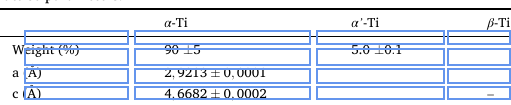

In [28]:
scale_factor = 1.0
boxes = [[b[0], b[1], b[2], b[3], b[4]] for b in tables[0].metadata["predicted_boxes"]]
visualize_table_with_boxes(tables[0], boxes, parsed_paper, False)


In [19]:
from papermage_components.table_transformer_structure_predictor import *

In [110]:
pixel_values = structure_transform(img).unsqueeze(0)
with torch.no_grad():
    outputs = tsp.model(pixel_values)
structure_id2label = tsp.model.config.id2label
structure_id2label[len(structure_id2label)] = "no object"
predictions = format_model_output(outputs, structure_id2label, img.size)
header_column_mapping = get_header_column_cell_mapping(predictions)

In [115]:
globalize_box_coordinates(predictions[0].bbox, tables[0].boxes[0], parsed_paper)

Box[0.6207017268469, 0.11837282781856055, 0.1471481184090125, 0.043908981335024154, 2]

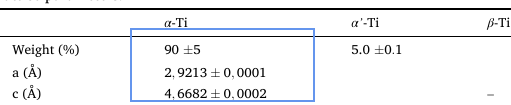

In [118]:
visualize_table_with_boxes(tables[0], [globalize_box_coordinates(p.bbox, tables[0].boxes[0], parsed_paper).to_json() for p in predictions][:1], parsed_paper, False)

In [112]:
predictions[0]

TatrPrediction(label='table column', score=0.9999663829803467, bbox=Box[0.23791079223155975, 0.13491415977478027, 0.3663622736930847, 0.8255661129951477, -1])

In [103]:
predictions[0]

TatrPrediction(label='table column', score=0.9999663829803467, bbox=Box[121.57241821289062, 14.165987014770508, 308.7835388183594, 100.85042572021484, -1])

In [104]:
img.size

(511, 105)

In [109]:
predictions[0].bbox.l/511, 308/511

(0.23791079885105798, 0.6027397260273972)

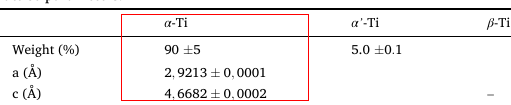

In [96]:
from PIL import ImageDraw

cropped_table_visualized = img.copy()
draw = ImageDraw.Draw(cropped_table_visualized)

for prediction in predictions[:1]:
  draw.rectangle(prediction.bbox.to_json()[:4], outline="red")

cropped_table_visualized